In [1]:
from sklearn.decomposition import NMF
import pandas as pd
import numpy as np
import random

In [20]:
N=50
d1 = pd.DataFrame({'A':np.random.uniform(0,1,N),'B':np.random.uniform(0,5,N)})
d1['C'] = np.random.uniform(0,d1.A+d1.B,N)
d1['count'] = np.random.poisson(np.mean(d1.A+d1.B+d1.C),N)
d1['col'] = ['red']*N

In [21]:
N=50
d2 = pd.DataFrame({'A':np.random.uniform(0,1,N),'B':np.random.uniform(1,5,N)})
d2['C'] = np.random.uniform(0,d2.A+d2.B,N)
d2['count'] = np.random.poisson(np.mean(d2.A*d2.B*d2.C),N)
d2['col'] = ['blue']*N

In [22]:
d0 = pd.concat([d1,d2])
d0.reset_index(drop=True,inplace=True)

In [32]:
d0.head()

,A,B,C,count,col
0,0.932743,3.395687,1.695863,4,red
1,0.720174,4.223758,1.215573,2,red
2,0.211632,1.925570,1.975811,2,red
3,0.122811,0.043344,0.108573,4,red
4,0.115054,2.098862,0.133251,4,red


In [37]:
[True]*7 + [False]*10

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [36]:
d0.drop('col',axis=1).clip(100)

,A,B,C,count
0,100.0,100.0,100.0,100.0
1,100.0,100.0,100.0,100.0
2,100.0,100.0,100.0,100.0
3,100.0,100.0,100.0,100.0
4,100.0,100.0,100.0,100.0
5,100.0,100.0,100.0,100.0
6,100.0,100.0,100.0,100.0
7,100.0,100.0,100.0,100.0
8,100.0,100.0,100.0,100.0
9,100.0,100.0,100.0,100.0


In [34]:
d0.drop('col',axis=1).apply(lambda x: all(x>=0),axis=0)

A        True
B        True
C        True
count    True
dtype: bool

In [23]:
nmf_obj = NMF(n_components=2,random_state=0)
W = nmf_obj.fit_transform(d0.drop('col',axis=1))
H = nmf_obj.components_

In [24]:
W

array([[0.57236161, 0.55401704],
       [0.2817248 , 0.64260965],
       [0.28947184, 0.38249268],
       [0.57045458, 0.        ],
       [0.56529797, 0.26061799],
       [1.27772517, 0.45900252],
       [0.8600849 , 0.32875659],
       [0.56360014, 0.6868186 ],
       [1.00542295, 0.56397093],
       [0.71633219, 0.15864758],
       [0.70945787, 0.56057506],
       [0.57221614, 0.47391905],
       [0.28296673, 0.42982104],
       [0.43261321, 0.0592977 ],
       [1.71251142, 0.13011707],
       [0.8632292 , 0.70954115],
       [0.99280494, 0.52910458],
       [0.42721521, 0.5869952 ],
       [1.00700714, 0.4879829 ],
       [0.42666566, 0.06285489],
       [0.7174863 , 0.86062392],
       [1.15007081, 0.75053884],
       [1.57433628, 0.61310457],
       [0.56264929, 0.66558194],
       [0.57109354, 0.24097198],
       [0.57567179, 0.53273956],
       [0.43211984, 0.62203599],
       [0.43773872, 0.67460661],
       [0.71790062, 0.87545112],
       [0.71065491, 0.65754875],
       [0.

In [25]:
H

array([[0.25645814, 0.16220137, 0.38225838, 6.9979093 ],
       [0.63201834, 5.83236691, 3.07310161, 0.        ]])

In [26]:
d0.col.shape

(100,)

In [27]:
dW = pd.DataFrame(W,columns=['dim1','dim2'])
dW['col'] = d0.col

# plots

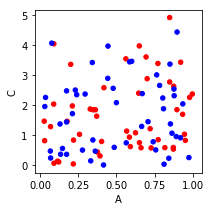

In [28]:
d0.plot(x='A',y='C',color=d0.col,kind='scatter',figsize=(3,3))

In [29]:
#d.plot(x='B',y='C',kind='scatter',figsize=(3,3))

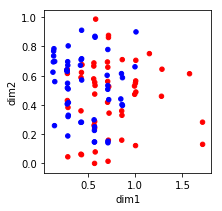

In [30]:
dW.plot(x='dim1',y='dim2',color=dW.col,kind='scatter',figsize=(3,3))